In [109]:
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely import geometry
from shapely import wkt
from libpysal.weights import contiguity
from libpysal.weights import lag_spatial
from pyproj import CRS
import mapclassify as mc
import splot
import esda
import seaborn as sns
from esda.moran import Moran
from splot.esda import moran_scatterplot
from splot.esda import plot_moran
import matplotlib.pyplot as plt
import gc
from esda.moran import Moran_Local
from splot.esda import lisa_cluster
from splot.esda import plot_local_autocorrelation
from splot.libpysal import plot_spatial_weights
from esda.moran import Moran_BV_matrix
from splot.esda import moran_facet

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
%config Completer.use_jedi = False

In [110]:
def load_shp_from_csv(name:str):
    df = pd.read_csv(f'../datasets/preprocessed_data/df_{name}.csv')
    df['geometry'] = df['geometry'].apply(wkt.loads)
    df = gpd.GeoDataFrame(df, crs='epsg:4258')
    return df

In [111]:
warszawa = load_shp_from_csv("warszawa")
krakow = load_shp_from_csv("krakow")
poznan = load_shp_from_csv("poznan")

print(warszawa.shape, krakow.shape, poznan.shape)

(601, 32) (396, 32) (324, 32)


# Non-spatial SEDA

# Spatial SEDA

C:\Users\wozni\AppData\Local\Continuum\anaconda3\lib\site-packages\splot\_viz_libpysal_mpl.py:115: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids_shp = gdf.centroid.values
C:\Users\wozni\AppData\Local\Continuum\anaconda3\lib\site-packages\splot\_viz_libpysal_mpl.py:154: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf.centroid.plot(ax=ax, **node_kws)


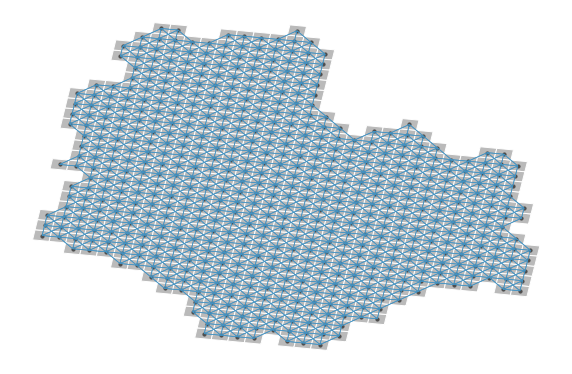

In [127]:
df = warszawa.copy()
df_facet = df[['poczta', 'dhl', 'inpost', 'dpd', 'ruch']]
y = df.inpost.values
w = contiguity.Queen.from_dataframe(df)
w.transform = 'r'

plot_spatial_weights(w, df)
plt.show()

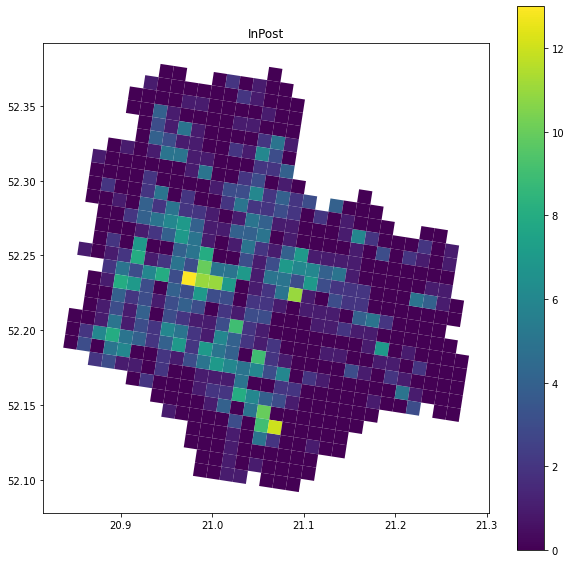

C:\Users\wozni\AppData\Local\Continuum\anaconda3\lib\site-packages\mapclassify\classifiers.py:235: UserWarning: Warning: Not enough unique values in array to form k classes
  "Warning: Not enough unique values in array to form k classes", UserWarning
C:\Users\wozni\AppData\Local\Continuum\anaconda3\lib\site-packages\mapclassify\classifiers.py:237: UserWarning: Warning: setting k to 5
  Warn("Warning: setting k to %d" % k_q, UserWarning)


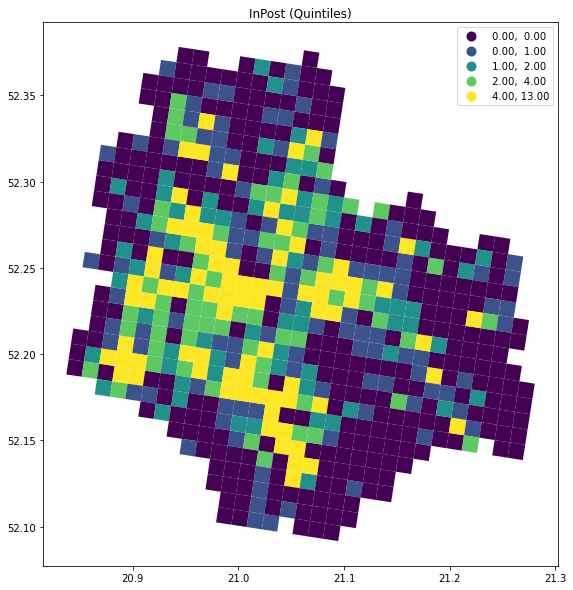

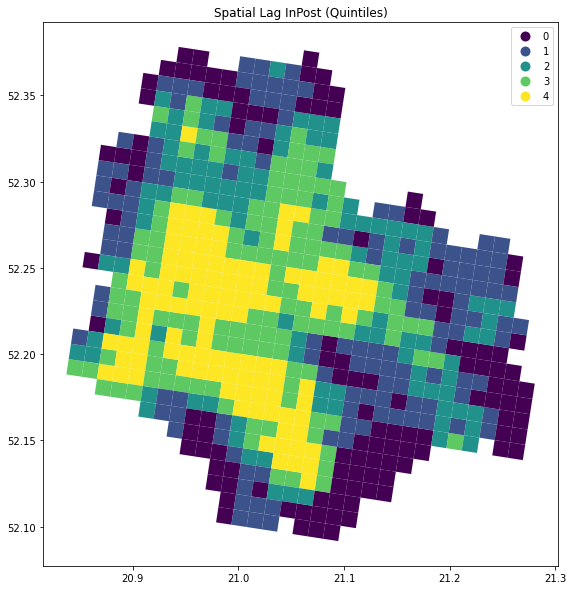

In [128]:
 df.plot(column="inpost", legend=True, figsize=(10,10))
plt.title("InPost")
plt.show()

df.plot(column='inpost', scheme='Quantiles', k=6, legend=True, figsize=(10,10))
plt.title("InPost (Quintiles)")
plt.show()

ylag = lag_spatial(w, y)
ylagq5 = mc.Quantiles(ylag, k=5)

f, ax = plt.subplots(1, figsize=(10, 10))
df.assign(cl=ylagq5.yb).plot(column='cl', categorical=True, k=5, linewidth=0.1, ax=ax, legend=True, cmap="viridis")
plt.title("Spatial Lag InPost (Quintiles)")
plt.show()

Moran's I 0.4020725532811403 
p-value of I under normality assumption 0.0 
p-value based on permutations 0.001


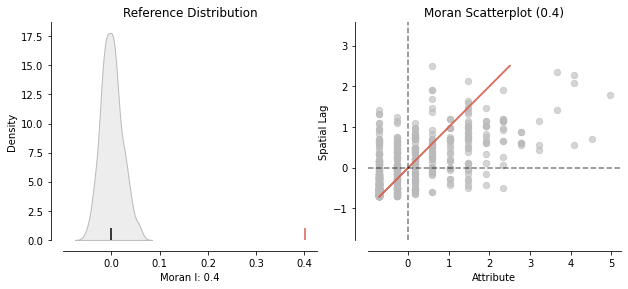

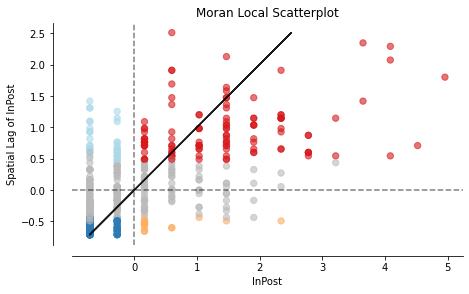

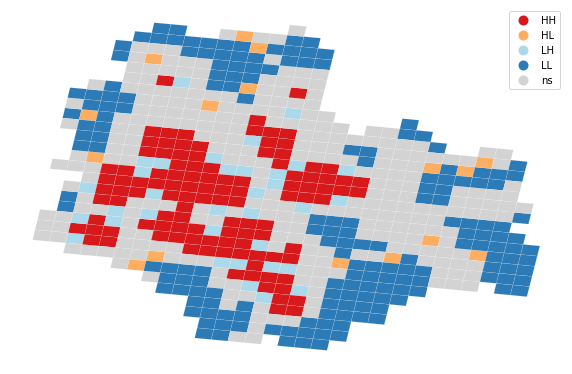

In [129]:
mi = esda.moran.Moran(y, w)
print("Moran's I", mi.I, "\np-value of I under normality assumption", mi.p_norm, "\np-value based on permutations", mi.p_sim)

plot_moran(mi, zstandard=True, figsize=(10,4))
plt.show()

moran_loc = Moran_Local(y, w)

fig, ax = moran_scatterplot(moran_loc, p=0.1)
ax.set_xlabel('InPost')
ax.set_ylabel('Spatial Lag of InPost')
plt.show()

lisa_cluster(moran_loc, df, p=0.1, figsize = (10, 10), legend=True, )
plt.show()

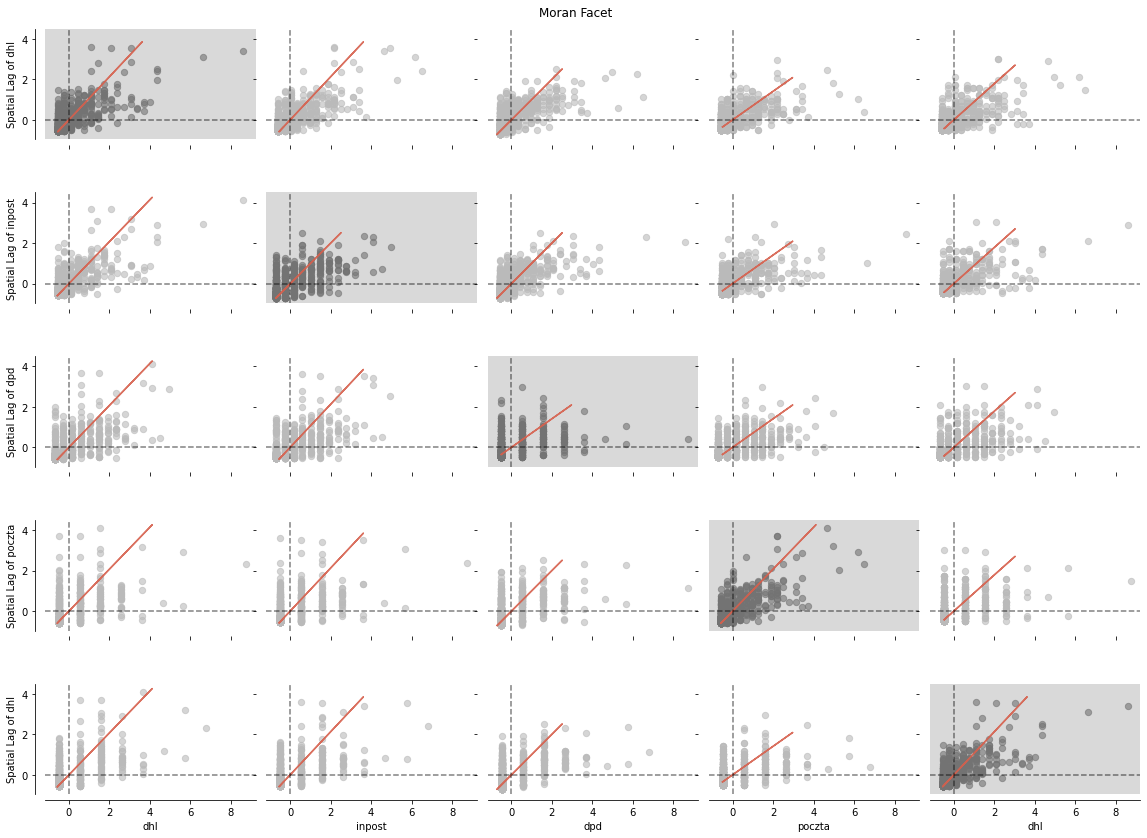

In [130]:
matrix2 = Moran_BV_matrix(df_facet, w)
moran_facet(matrix2)
plt.show()